# **Breast Cancer Classification with Logistic Regression, SVM, and Feed-Forward Neural Network**

This notebook showcases the full workflow, from data loading and preprocessing to training, evaluating, and comparing three models: Logistic Regression, SVM, and a Feed-Forward Neural Network.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

Cell 2 Below: Data Loading and Preprocessing

In [4]:
# Load and preprocess data
def load_data(file_path):
    """
    Loads data from a CSV file, encodes the target variable, and returns features and target.

    Parameters:
    - file_path (str): Path to the dataset CSV file.

    Returns:
    - X (DataFrame): Features without irrelevant columns like 'id'.
    - y (Series): Binary target variable (0 = Benign, 1 = Malignant).
    """
    # Load dataset
    file_path = r'C:\Users\stef\Documents\Uni\EECE\EECE 490\assignment 3\Breast Cancer Classification\data\breast_cancer_data.csv'
    df = pd.read_csv(file_path)
    
    # Encode target variable: 0 for Benign, 1 for Malignant
    df["diagnosis"] = df["diagnosis"].map({"B": 0, "M": 1})
    
    # Drop the 'id' column as it is not a feature
    X = df.drop(columns=["id", "diagnosis"], errors="ignore")
    y = df["diagnosis"]
    
    return X, y

def preprocess_data(X, y, test_size=0.2):
    """
    Splits the data into training and testing sets, then scales the features.

    Parameters:
    - X (DataFrame): Features.
    - y (Series): Target variable.
    - test_size (float): Proportion of the dataset to include in the test split.

    Returns:
    - X_train (ndarray): Scaled training features.
    - X_test (ndarray): Scaled testing features.
    - y_train (Series): Training target variable.
    - y_test (Series): Testing target variable.
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

# Define file path and load data
file_path = 'data/breast_cancer_data.csv'  # Update to the correct path of your dataset
X, y = load_data(file_path)
X_train, X_test, y_train, y_test = preprocess_data(X, y)


Cell 3: Model Definitions

In [5]:
# Logistic Regression
def logistic_regression():
    return LogisticRegression()

# Support Vector Machine
def svm_classifier():
    return SVC()

# Enhanced Feed-Forward Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.layer2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.layer3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.output = nn.Linear(32, 1)
        
        self.dropout = nn.Dropout(0.3)  # Dropout rate of 30%

    def forward(self, x):
        x = F.relu(self.bn1(self.layer1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.layer2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.layer3(x)))
        x = self.dropout(x)
        x = torch.sigmoid(self.output(x))  # Output layer with sigmoid for binary classification
        return x


Cell 4: Model Evaluation and Visualization

In [6]:
# Model evaluation function
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
    
    print(f"{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    return metrics

# Plotting function
def plot_metrics_comparison(metrics_list):
    models = [metrics["Model"] for metrics in metrics_list]
    accuracies = [metrics["Accuracy"] for metrics in metrics_list]
    precisions = [metrics["Precision"] for metrics in metrics_list]
    recalls = [metrics["Recall"] for metrics in metrics_list]
    f1_scores = [metrics["F1 Score"] for metrics in metrics_list]
    
    fig, ax = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle('Model Performance Comparison')
    
    ax[0, 0].bar(models, accuracies, color='skyblue')
    ax[0, 0].set_title('Accuracy')
    ax[0, 0].set_ylim(0, 1)
    
    ax[0, 1].bar(models, precisions, color='salmon')
    ax[0, 1].set_title('Precision')
    ax[0, 1].set_ylim(0, 1)
    
    ax[1, 0].bar(models, recalls, color='lightgreen')
    ax[1, 0].set_title('Recall')
    ax[1, 0].set_ylim(0, 1)
    
    ax[1, 1].bar(models, f1_scores, color='orange')
    ax[1, 1].set_title('F1 Score')
    ax[1, 1].set_ylim(0, 1)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


Cell 5: Training and Evaluating Models

Logistic Regression - Accuracy: 0.97, Precision: 0.98, Recall: 0.95, F1 Score: 0.96
SVM - Accuracy: 0.98, Precision: 1.00, Recall: 0.95, F1 Score: 0.98
Neural Network - Accuracy: 0.96, Precision: 0.93, Recall: 0.95, F1 Score: 0.94


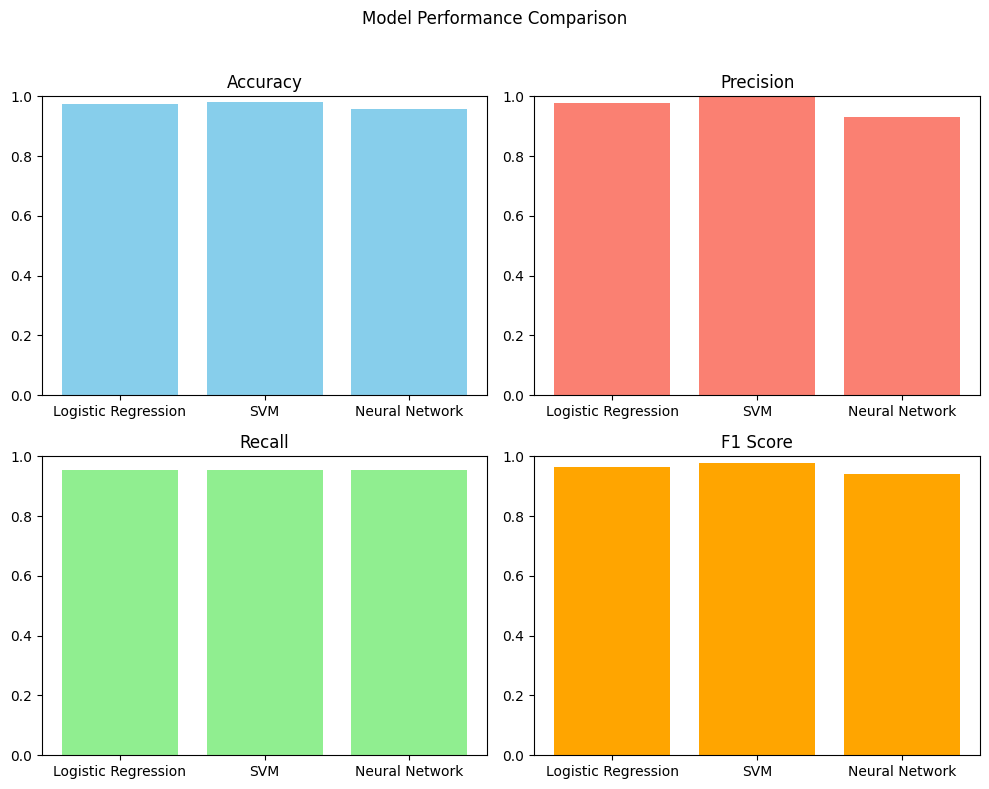

In [8]:
# List to hold metrics for all models
metrics_list = []

# Logistic Regression Model
log_model = logistic_regression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
metrics_list.append(evaluate_model(y_test, y_pred_log, "Logistic Regression"))

# Support Vector Machine Model
svm_model = svm_classifier()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
metrics_list.append(evaluate_model(y_test, y_pred_svm, "SVM"))

# Feed-Forward Neural Network Model
input_size = X_train.shape[1]
nn_model = NeuralNetwork(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(nn_model.parameters(), lr=0.001)

# Training loop for the neural network
for epoch in range(100):  # Adjust epochs as needed
    nn_model.train()
    optimizer.zero_grad()
    outputs = nn_model(torch.tensor(X_train, dtype=torch.float32))
    loss = criterion(outputs, torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1))
    loss.backward()
    optimizer.step()

# Evaluate Neural Network
nn_model.eval()
with torch.no_grad():
    outputs = nn_model(torch.tensor(X_test, dtype=torch.float32))
    y_pred_nn = torch.round(outputs).squeeze().numpy()
metrics_list.append(evaluate_model(y_test, y_pred_nn, "Neural Network"))

# Plot the metrics comparison
plot_metrics_comparison(metrics_list)
